# Practice Session 09: Viral Propagation

In this session we will use [NetworkX](https://networkx.github.io/) for simulating propagations through a network.

We will use the [SFHH Conference Dataset](http://www.sociopatterns.org/datasets/sfhh-conference-data-set/), which approximately describes face to face interactions between 403 attendees to an academic conference in 2009 that took place in Nice, France. These 403 attendees agred to wear a badge containing an RFID tag and receiver which picked up signals from other RFID tags, and which allowed to log (anonymously) timestamps corresponding to being in close proximity of each other.

The dataset you will use is contained on the file `sfhh-conference-2009.csv` and for simplicity does not include the time variable that is present in the original dataset.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. The SFHH Conference Dataset

Below we provide code to load and do a default drawing of the graph. You can leave as-is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
import io
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
INPUT_FILENAME = "sfhh-conference-2009.csv"

In [3]:
# Create a new undirected graph
g = nx.Graph()

with io.open(INPUT_FILENAME) as input_file:
    # Create a CSV reader for a comma-delimited file with a header
    reader = csv.DictReader(input_file, delimiter=',')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        
        # Add one edge per record
        g.add_edge(record['Source'], record['Target'])

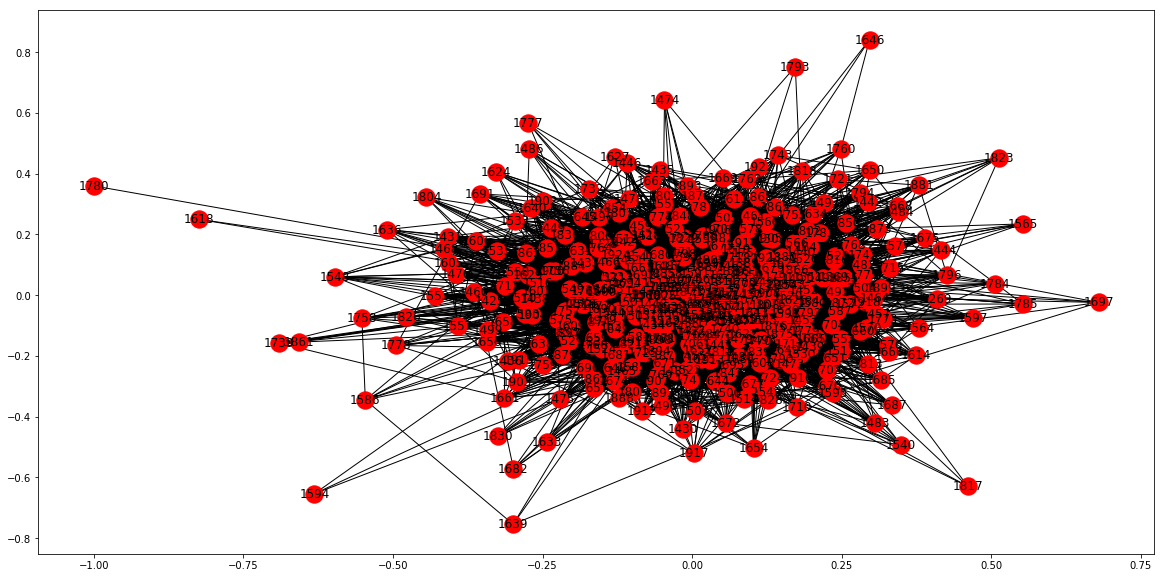

In [4]:
# Create an empty figure; feel free to change size to accommodate to your screen
plt.figure(figsize=(20,10))

# Draw the graph
nx.draw_networkx(g)

<font size="+1" color="red">Replace this cell with a brief commentary indicating the number of nodes (g.number_of_nodes()), edges (g.number_of_edges()), and connected components of this graph, plus any other fact about it you notice.</font>

# 2. Independent cascade model

Next, we will simulate the independent cascade propagation model. We will assume each edge has the same probability of transmission, *0 < beta < 1*.

Your algorithm should do the following:

1. Initialize an `infected` dictionary with every node having value `False`
1. Mark a starting node *u* as infected with value `True`
1. For each neighbor *v* of this node:
  * If the neighbor *v* is not infected:
    * Generate a random r number in [0, 1] using [random.uniform](https://docs.python.org/3/library/random.html)
    * If r is smaller than the probability of transmission of edge *(u,v)*:
      * Infect node *v*
1. Return the `infected` dictionary

Your code should look like this:

```python
def infect_recursive(graph, starting_node, beta, infected):
    # YOUR CODE HERE

def simulate_independent_cascade(graph, starting_node, beta):
    infected = dict([(node, False) for node in graph.nodes()])
    # YOUR CODE HERE
    return infected
```

Tip: use an auxiliary function `infect_recursive(graph, node, beta, infected)` that takes as input a *graph*, a *node* to be infected, the transmission probability *beta*, the dictionary *infected* and infects node *node* and tries to infect all the neighbors of node (`graph.neighbors(node)`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code implementing simulate_independent_cascade.</font>

Next, write function `simulate_multiple_independent_cascades(graph, beta, repetitions)` that takes as input a graph and a transmisibility parameter *beta*, and a number of trials *repetitions* and repeats *repetitions* times the following:

1. Picks a random node in the graph, using `random.choice(list(g.nodes()))`
1. Simulate an independent cascade starting from that node

The function should return the average number of infected nodes across the *repetitions* done. 

Tip: to get the number of `True` values in the values of a dictionary `d`, you can just use `sum(d.values())`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code implementing simulate_multiple_independent_cascades.</font>

Create a plot that should have in the x axis the transmission probability *beta*, and in the y axis the expected fraction of infected nodes. Remember to label both axis. You can use the following code as a template, but remember to set figure size and *include labels* in the plot.

```python
STARTING_PROB = 0
ENDING_PROB = 0.5
STEP_PROB = 0.01
REPETITIONS = 100

beta_values = []
infected_values = []

for beta in np.arange(STARTING_PROB, ENDING_PROB, STEP_PROB):
    n_infected = simulate_multiple_independent_cascades(g, beta, REPETITIONS)
    beta_values.append(beta)
    infected_values.append(n_infected/g.number_of_nodes())
    
_ = plt.plot(beta_values, infected_values, 'o-')

```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for plotting the expected fraction of nodes that are infected as a function of the contagion probability.</font>

<font size="+1" color="red">Replace this cell with a brief commentary of what you observe on this plot. At which transmissibility you start to notice that almost all nodes end up infected? Why does this happen?</font>

# 3. Reduce maximum degree

Next, we will simulate what happens if we reduce the degree of nodes so that it is always less than a certain number. We will start by looking at the degree distribution in this plot. You can use the following function, that you may leave as is.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

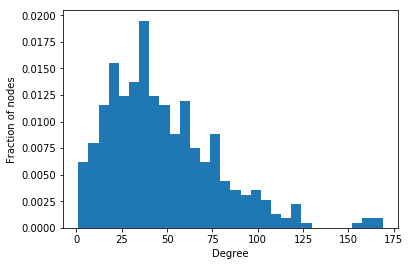

In [5]:
# Function to plot degree distribution
# adapted from https://stackoverflow.com/a/53970607/1235784
def plot_degree_dist(graph):
    
    # Obtain the sequence of degree of nodes
    degrees = [graph.degree(node) for node in graph.nodes()]
    
    # Draw the histogram of the degree
    plt.hist(degrees, density=True, bins=30)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of nodes")
    plt.show()
    
plot_degree_dist(g)

Create a function `graph_max_degree(graph, max_degree)` that returns a copy of *graph* in which no node has degree larger than *max_degree*. 

There are many ways of doing this, a relatively easy one is this:

1. Create an empty graph
1. Iterate through all nodes in the input graph, creating that node in the output graph
1. Obtain the list of edges of the inpu graph with `g.edges()`
1. Randomly shuffle that list of edges using `np.random.permutation()`
1. Add each edge *(u,v)* to the output graph as long as the degree of the *u* and the edge of *v* is smaller than max_degree

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code implementing graph_max_degree</font>

In [ ]:
# Test the output of your function graph_max_degree
gmax = graph_max_degree(g, 20)

# If you notice nodes with degree larger than specified,
# it means your graph_max_degree function is deffective.
plot_degree_dist(gmax)

Now, let us assume beta has a constant value *BETA=0.1*, which we will use for the following experiments. That means that only 1 in 10 encounters between an infected and a susceptible person will produce an infection.

Create a graph that has in the x axis the maximum degree allowed, and on the y axis the fraction of infected nodes on the graph. Perform experiments setting the maximum degree to 2, 3, 4, 5, ..., 99, 100. Remember to repeat each experiment at least *REPETITION* times (100) and plotting the average. Remember to include labels in your plot's axes.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for creating the requested plot</font>

<font size="+1" color="red">Replace this cell with a brief commentary with your observations on this plot. How would you set the maximum degree to ensure less than half of the people are infected?</font>

# 4. Random immunization

Finally, we will immunize some nodes. These nodes cannot catch the infection. We will create a `immunity` dictionary in which keys are nodes and `immunity[node] = True` if and only if the *node* cannot be infected.


Write function `give_immunity(graph, fraction)` that returns a dictionary in which keys are the nodes in *graph* and `fraction * graph.number_of_nodes()` nodes are immune.

Write functions `simulate_independent_cascade_immune` and `infect_recursive_immune` as variations of your previous code that receive as extra parameter this dictionary.


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for give_immunity, simulate_independent_cascade_immune, and infect_recursive_immune</font>

Perform simulations in which you immunize a fraction of nodes *0.00, 0.05, 0.10, ..., 1.00*, repeating at least *REPETITIONS = 100* times each simulation, and plot a graph in which in the x axis is the fraction of immunized nodes and in the y axis the fraction of infected nodes. Assume a constant *BETA=0.1*. At each repetition, you should pick a random node, immunize the requested fraction of nodes, and run the independent cascade model.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for performing the requested simulations</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the result of these simulations</font>

# 5. Conclusions

<font size="+1" color="red">Replace this cell with a brief commentary on what are the *limitations* of what we just did. Which are some of the many reasons why you should not be drawing general conclusions about how to deal with a pandemic from this exercise?</font>

# Deliver (individually)

A .zip file containing:

* This notebook.


## Extra points available

For extra points and extra learning (+2, so your maximum grade can be a 12 in this assignment), include one more immunization strategy: "targeted immunization", in which the people who receive the vaccine are the people with the largest degree. Plot one graph of percentage immunized vs fraction infected comparing the two strategies: random immunization and targeted immunization. Add a brief commentary with your conclusions.

**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: targeted immunization</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>